## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Data prep for regression analysis
#### 5. Regression analysis

### 1. Importing libraries and data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# This ensures that graphs are displayed within the notebook without the need to "call" them specifically
%matplotlib inline

In [6]:
# Define path
path = r'C:\Users\16307\Desktop\Tasks - DA Immersion\Gun Violence Analysis'

In [7]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'gun_violence_cleaned3.csv'))

### 2. Data wrangling 

In [9]:
columns = ["adult_count", "male_count", "female_count"]

In [10]:
# Create a subset
subset_df = df[columns]

In [11]:
subset_df.head()

,adult_count,male_count,female_count
0,5,3,1
1,4,1,0
2,5,5,0
3,4,3,1
4,3,2,2


In [12]:
subset_df.shape

(239677, 3)

### 3. Data cleaning

##### Missing values

In [15]:
# Check for missing values
subset_df.isnull().sum()

# No missing values

adult_count     0
male_count      0
female_count    0
dtype: int64

##### Duplicates check

In [17]:
dups = df.duplicated()
dups.shape # No dups

(239677,)

##### Extreme values checks

<Axes: xlabel='male_count', ylabel='Count'>

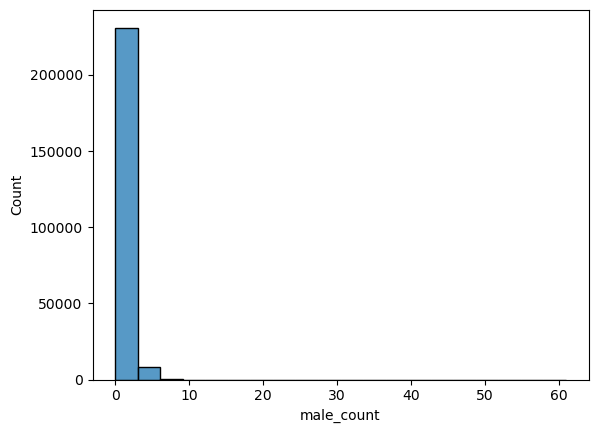

In [19]:
# Shows extreme values for 'male_count'
sns.histplot(subset_df['male_count'], bins=20, kde=False)

In [20]:
# Check mean
subset_df['male_count'].mean()

1.2896147732156193

In [21]:
# Check median
subset_df['male_count'].median()

1.0

In [22]:
# Check max
subset_df['male_count'].max()

61

### 3. Data prep for regression analysis 

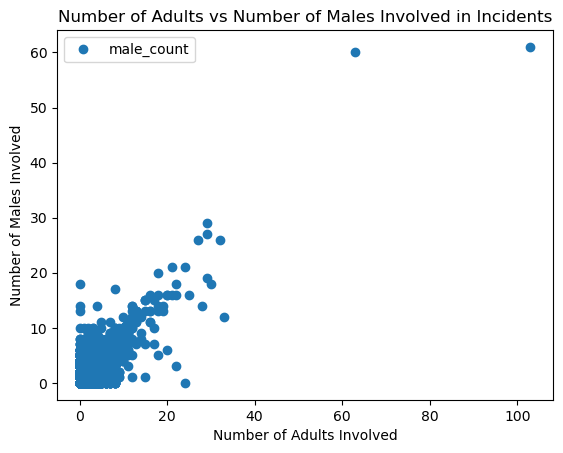

In [24]:
# Create a scatterplot using matplotlib to see how the chosen variables plot against each other.

subset_df.plot(x = 'adult_count', y='male_count',style='o')
plt.title('Number of Adults vs Number of Males Involved in Incidents')  
plt.xlabel('Number of Adults Involved')  
plt.ylabel('Number of Males Involved')  
plt.show()

**Hypothesis:**
As the number of adults involved in gun violence incidents increases, so does the number of males involved (compared to females).

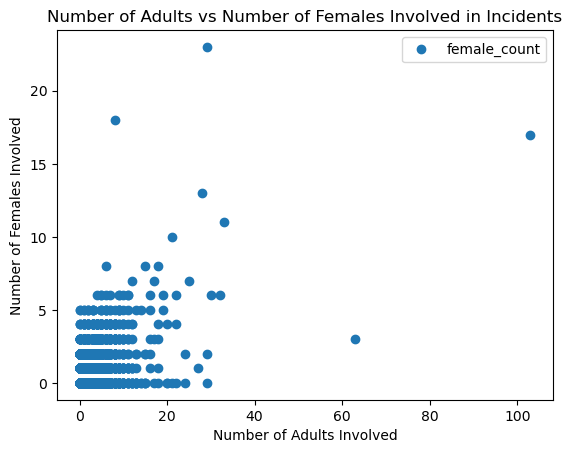

In [42]:
# Create a scatterplot using matplotlib to see how the chosen variables plot against each other.

subset_df.plot(x = 'adult_count', y='female_count',style='o')
plt.title('Number of Adults vs Number of Females Involved in Incidents')  
plt.xlabel('Number of Adults Involved')  
plt.ylabel('Number of Females Involved')  
plt.show()

In [44]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = subset_df['adult_count'].values.reshape(-1,1)
y = subset_df['male_count'].values.reshape(-1,1)

In [46]:
X

array([[5],
       [4],
       [5],
       ...,
       [1],
       [1],
       [2]], dtype=int64)

In [48]:
y

array([[3],
       [1],
       [5],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [50]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [53]:
# Create a regression object

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

In [55]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [57]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

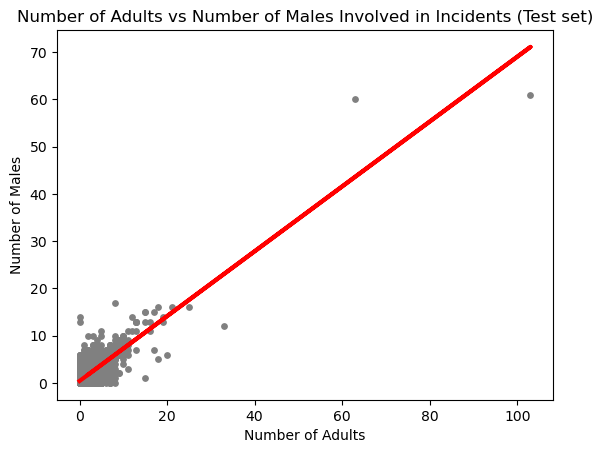

In [59]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Adults vs Number of Males Involved in Incidents (Test set)')
plot_test.xlabel('Number of Adults')
plot_test.ylabel('Number of Males')
plot_test.show()

**Interpretation:**
The line shows some positive relationship but shows no real pattern until the count is around ~8 adults/males. 

In [61]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [63]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.68645613]]
Mean squared error:  0.5250831560187809
R2 score:  0.5616064203399593


In [65]:
y_predicted

array([[0.41227501],
       [2.47164339],
       [1.09873114],
       ...,
       [0.41227501],
       [0.41227501],
       [1.78518727]])

In [67]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.412275
1,2,2.471643
2,0,1.098731
3,1,1.098731
4,2,1.785187
5,1,1.098731
6,4,0.412275
7,2,1.785187
8,1,1.098731
9,2,1.785187


##### Compare how the regression fits the training set

In [70]:
# Predict

y_predicted_train = regression.predict(X_train) 

In [72]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [74]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.68645613]]
Mean squared error:  0.5235544897627307
R2 score:  0.5306916289323867


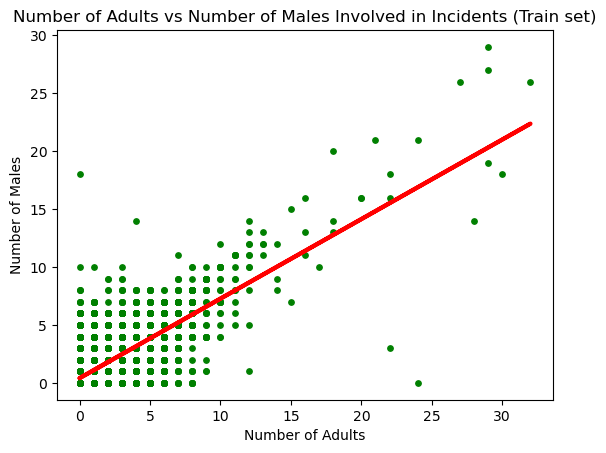

In [76]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of Adults vs Number of Males Involved in Incidents (Train set)')
plot_test.xlabel('Number of Adults')
plot_test.ylabel('Number of Males')
plot_test.show()

**Slope:**
The slopes are the same at 0.68645613

**Mean squared error:**
0.5251 before compared to 0.5236 after. This means that the accuracy of the model improved. Lower MSE equates to better model performance.

**R2 score:**
0.5616 before compared to 0.5307 after. This means that the accuracy of the model worsened. An R2 score closer to 1 equates to better model performance.